Setting up directory and reading the cleaned data

In [1]:
import os
import pandas as pd
os.getcwd()

'e:\\2025\\algerian_forest_fire\\notebooks'

In [2]:
file_path = os.path.join("..","datasets","Algerian_fire_cleaned.csv")

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

Doing feature selection

In [37]:
##drop month,day and year 
df = df_copy.drop(['day','month','year'],axis =1)

In [38]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [39]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [40]:
## Selecting independent & dependent features
X = df.drop('DMC', axis=1)
y = df['DMC']

In [41]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,14.2,1.2,3.9,0.5,0,0


In [42]:
y.head(10)

0     3.4
1     4.1
2     2.5
3     1.3
4     3.0
5     5.8
6     9.9
7    12.1
8     7.9
9     9.5
Name: DMC, dtype: float64

In [43]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =42)

In [45]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((193, 11), (49, 11), (193,), (49,))

In [46]:
#Feature Selection based on corr
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.644665,-0.304799,-0.311523,0.683819,0.353492,0.603945,0.432097,0.555806,0.516338,0.238161
RH,-0.644665,1.000000,0.256820,0.217281,-0.629780,-0.228409,-0.692313,-0.347590,-0.582225,-0.436833,-0.370251
Ws,-0.304799,0.256820,1.000000,0.219602,-0.162312,0.105831,0.007793,0.043306,0.032371,-0.049666,-0.244472
Rain,-0.311523,0.217281,0.219602,1.000000,-0.538801,-0.299382,-0.348983,-0.294253,-0.324925,-0.371991,-0.054843
FFMC,0.683819,-0.629780,-0.162312,-0.538801,1.000000,0.529252,0.757606,0.600931,0.709538,0.789280,0.216174
DC,0.353492,-0.228409,0.105831,-0.299382,0.529252,1.000000,0.546486,0.949699,0.775001,0.533764,-0.110306
ISI,0.603945,-0.692313,0.007793,-0.348983,0.757606,0.546486,1.000000,0.653874,0.917694,0.749138,0.260387
BUI,0.432097,-0.347590,0.043306,-0.294253,0.600931,0.949699,0.653874,1.000000,0.869566,0.596569,0.066863
FWI,0.555806,-0.582225,0.032371,-0.324925,0.709538,0.775001,0.917694,0.869566,1.000000,0.731910,0.187574
Classes,0.516338,-0.436833,-0.049666,-0.371991,0.789280,0.533764,0.749138,0.596569,0.731910,1.000000,0.170367


<Axes: >

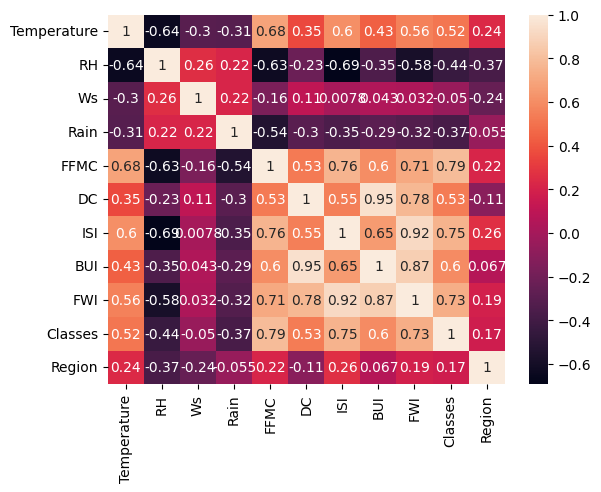

In [47]:
import seaborn as sns
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [48]:
def correlated_features(df,threshold):
    '''
    returns set of features having correlation more than the threshold from the d
    dataframe df
    '''
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [49]:
# Getting corr features
corr_features = correlated_features(X_train,0.85)

In [50]:
corr_features

{'BUI', 'FWI'}

In [51]:
## drop corr features
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [52]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,Classes,Region
115,29,65,19,0.6,68.3,15.2,1.5,0,0
206,33,37,16,0.0,92.2,167.2,13.1,1,1
158,35,47,18,6.0,80.8,9.7,3.1,1,1
132,27,58,17,0.0,88.9,37.8,8.7,1,1
84,34,64,14,0.0,88.9,171.3,9.0,1,0


In [53]:
X_train.shape,X_test.shape

((193, 9), (49, 9))

Scaling Standardisation

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
type(X_train_scaled)

numpy.ndarray

In [56]:
X_train_scaled.shape

(193, 9)

Text(0.5, 1.0, 'After scale')

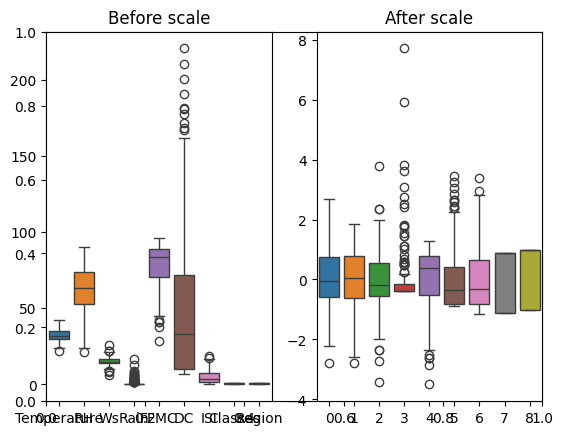

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots()
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("Before scale")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("After scale")

#Training multiple models

Mean absolute error 2.614823554058383
R2 Score 0.8537743354842353


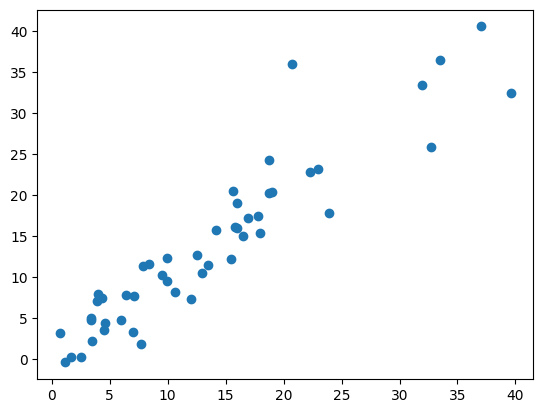

In [65]:
##Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
scores = {}
scores['LinearRegression'] = score


Mean absolute error 2.4448952324860356
R2 Score 0.8587034595051748


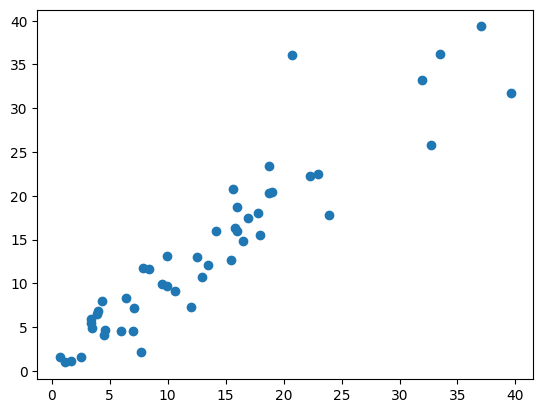

In [60]:
#Cross Validation Lasso
from sklearn.linear_model import LassoCV
lassocv =LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred= lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 2.5969658550475465
R2 Score 0.8554860531516714


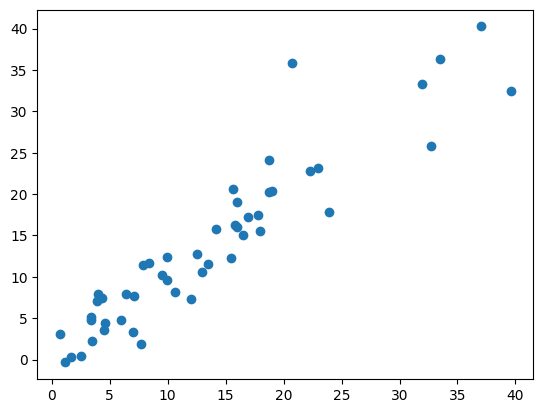

In [66]:
##Ridge Regression model
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
scores['Ridge Regression'] = score

Mean absolute error 2.477628994729217
R2 Score 0.8663062626433808


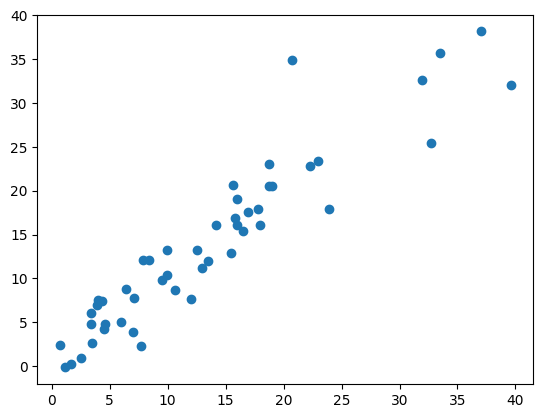

In [67]:
##RidgeCv
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
scores['RidgeCV'] = score

In [63]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean absolute error 3.014121606738797
R2 Score 0.8165799271247767


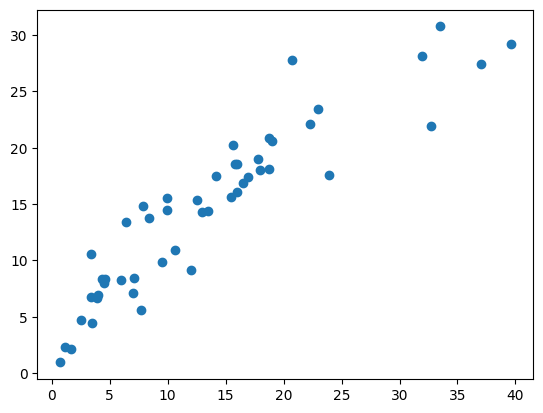

In [68]:
##Elasticnet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)
scores['Elasticnet Regression'] = score

Mean absolute error 2.5325863844929892
R2 Score 0.8590025188688435


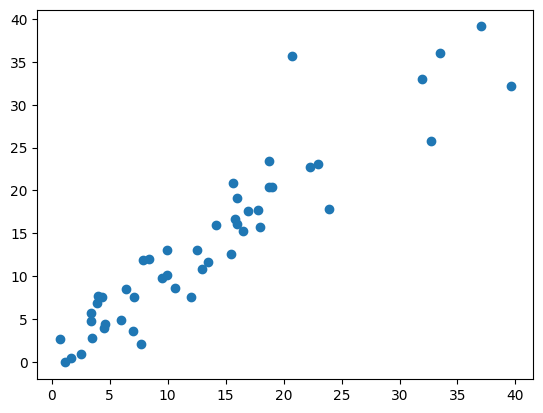

In [69]:
##ElasticNetCV
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
scores["ElasticnetCV"] = score


In [70]:
elasticcv.alphas_

array([22.8745293 , 21.33286258, 19.89509904, 18.55423595, 17.30374255,
       16.13752821, 15.04991282, 14.03559907, 13.08964667, 12.20744829,
       11.38470713, 10.61741598,  9.90183767,  9.23448696,  8.61211344,
        8.03168582,  7.49037708,  6.98555073,  6.51474799,  6.07567578,
        5.66619557,  5.28431295,  4.92816794,  4.59602592,  4.28626915,
        3.99738896,  3.72797832,  3.47672506,  3.24240543,  3.02387815,
        2.82007889,  2.63001501,  2.4527608 ,  2.28745293,  2.13328626,
        1.9895099 ,  1.8554236 ,  1.73037425,  1.61375282,  1.50499128,
        1.40355991,  1.30896467,  1.22074483,  1.13847071,  1.0617416 ,
        0.99018377,  0.9234487 ,  0.86121134,  0.80316858,  0.74903771,
        0.69855507,  0.6514748 ,  0.60756758,  0.56661956,  0.5284313 ,
        0.49281679,  0.45960259,  0.42862692,  0.3997389 ,  0.37279783,
        0.34767251,  0.32424054,  0.30238782,  0.28200789,  0.2630015 ,
        0.24527608,  0.22874529,  0.21332863,  0.19895099,  0.18